#**Credit Card Approval Status Classification**

***Note: Charts and graphs only visible in google colab.***

Link:https://docs.google.com/document/d/1FUs_6PuCMFm6Ii-w1EdNe4py8zTwFFyAWn_kmGUcKDM/edit?usp=sharing

Link_SQL: https://docs.google.com/document/d/1Pjo4JslsjsWge7FSE03BujS1fDgU0RTwrthhDSjaOmY/edit?usp=sharing

##**Introduction**

Our goal in this project is to create a classification model for credit card approval status. Based on multiple factors and criteria provided in the dataset, it is aimed at predicting whether a credit card application will be provided or declined. Financial companies are very interested in this classification issue since it can help them speed their application process and lower the risk of granting credit cards to people who might not be able to make their payments.


##**Objectives**

The main objectives of this project are as follows:

* Develop a machine learning model that can accurately predict credit card approval status.
* Identify the most important features that influence credit card approval decisions.
* Provide actionable insights to financial institutions for making more informed credit card approval decisions.

##**Dataset**

Credit_Card.csv

| Column name     | Description                                       |
|-----------------|---------------------------------------------------|
| Ind_ID          | Client ID                                         |
| Gender          | Gender information                               |
| Car_owner       | Having car or not                                |
| Propert_owner   | Having property or not                            |
| Children        | Count of children                                 |
| Annual_income   | Annual income                                     |
| Type_Income     | Income type                                       |
| Education       | Education level                                   |
| Marital_status  | Marital_status                                    |
| Housing_type    | Living style                                      |
| Birthday_count  | Use backward count from current day (0), -1 means yesterday. |
| Employed_days   | Start date of employment. Use backward count from current day (0). Positive value means the individual is currently unemployed. |
| Mobile_phone    | Any mobile phone                                 |
| Work_phone      | Any work phone                                   |
| Phone           | Any phone number                                 |
| EMAIL_ID        | Any email ID                                     |
| Type_Occupation | Occupation                                        |
| Family_Members  | Family size                                       |

Credit_card_label.csv

| Column name | Description                                       |
|-------------|---------------------------------------------------|
| ID          | The joining key between application data and credit status data, same as Ind_ID |
| Label       | 0 is application approved and 1 is application rejected. |


##**Approach**

To achieve our objectives, we will follow a systematic approach:

1. **Exploratory Data Analysis (EDA):**

* Explore the dataset to gain insights into feature distributions and relationships.
* Visualize relationships between features and the target variable.

2. **Data Preprocessing:**

* Data Cleaning: Handle missing values, outliers, and data inconsistencies.
* Feature Engineering: Create new features if necessary, encode categorical variables and feature selection.
* Split the data into training and testing sets.

3. **Model Selection:**

* Choose appropriate classification algorithms (e.g., Logistic Regression, Random Forest, XGBoost).
* Train multiple models and evaluate their performance using metrics like accuracy, precision, recall, and F1-score.

4. **Feature Importance Analysis:**

* Determine which features have the most significant impact on credit card approval decisions.

5. **Model Tuning:**

* Optimize the selected models by fine-tuning hyperparameters.

6. **Model Evaluation:**

* Assess the final model's performance on the test dataset and ensure it generalizes well.

7. **Conclusion and Recommendations:**

* Summarize the findings and provide recommendations to financial institutions based on the model's insights.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
!pip install -U kaleido
import plotly.express as px
import kaleido
from pathlib import Path

# Define the directory path for saving images
image_dir = Path.cwd().joinpath("images")
if not image_dir.is_dir():
    image_dir.mkdir()


filename = image_dir.joinpath("fig.png")

##Acquire data
Working with our datasets is made easier by the Python Pandas libraries. The datasets for the features and labels are first added to Pandas DataFrames. In order to perform specific actions on both datasets concurrently, we additionally merge these datasets.

In [3]:
# Loading dataset
data = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")

In [4]:
# Checking data shape for both datasets
print("Data shape :",data.shape)
print("Labels shape :",labels.shape)

Data shape : (1548, 18)
Labels shape : (1548, 2)


* We have two dataset with 1548 rows each. We have 18 features and 1 target feature.

In [5]:
# Merging both dataset
data = data.merge(labels, how='inner', on=['Ind_ID'])

##Description of data
Using Pandas, we can additionally define the datasets and provide early answers to the following queries.

**Which features are available in the dataset?**

In [6]:
# Fetching column names
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [7]:
# Separatinng numerical and categorical columns for separate analyis.
numerical_col = data.select_dtypes(include = ['int64', 'float64']).drop('label', axis=1).columns
categorical_col = data.select_dtypes(include = 'object').columns
print(numerical_col,categorical_col)

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members'],
      dtype='object') Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype='object')


**Which features are categorical?**

The samples are divided into groups of related samples using these values. Are there any nominal, ordinal, ratio, or interval bases for the values within categorical features? This assists us in a variety of ways, including in choosing the right plots for visualization.

* Nominal: GENDER, Car_Owner, Propert_Owner, Type_Income, Marital_status, Housing_type and Type_Occupation. Ordinal: EDUCATION.

**Which features are numerical?**

From sample to sample, these values vary. Are values inside numerical characteristics discrete, continuous, or based on timeseries? This assists us in a variety of ways, including in choosing the right plots for visualization.

* Continuous: Annual_income. Discrete: Ind_ID, CHILDREN, Birthday_count, Employed_days, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Family_Members, label.

In [8]:
# Preview of first 5 rows
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [9]:
# Preview of last 5 rows
data.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


**Which features are mixed data types?**

Alphanumeric and numeric data are contained in the same feature. These are potential goals that need to be corrected.
* No feature have the mix of letters and numbers.

**Which features may contain errors or typos?**

Reviewing a few examples from a smaller dataset, which is easier to do for a smaller dataset, may simply reveal which attributes would need to be corrected.
* EDUCATION, Marital_status and Housing_type contain errors like more than one data is inserted in a single row.

In [10]:
# Basic summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

**Which features contain blank, null or empty values?**

These need to be fixed.
* A significant portion of the values for the GENDER, Annual_income, Birthday_count, and Type_Occupation variables are null.

**What are the data types for various features?**

Knowledge of data types in the beggining helps us in future processing.
* 11 features are integers or floats.
* 8 features are categorical.


In [11]:
# Basic statistical summary of numerical data
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


**What is the distribution of numerical feature values across the samples?**

This enables us to assess the dataset's representation of the real problem domain, among other early insights.

* 50% of customers have no children, as they seem to be single.
* Few of the customers (< 2%) have more than one children ie. 16.
* Annual income varied significantly among the few customers, reaching as high as 15.7 lakh.
* Large population of the data have their own mobile phone.(> 75%)
* Small population of the data have work phone and email_id. (< 25%)
* Family size increases drastically for the few customers (< 25%) as high as 15 members.
* Less than 25% of the customers were rejected for loan approval.

In [12]:
# Basic statistics of categorical data
data.describe(include= 'object')

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


In [13]:
# Checking for duplicates in the data
data.duplicated().sum()

0

**What is the distribution of categorical features?**

* Gender variable has two possible values, with 63% female. (top=female, freq=973/count=1541).
* 60% of the customers don't own a car.
* 65% of the customers own a property.
* Most of the customers are working-class, nearly 50%.
* 25% of the customers were laborers.
* Nearly 90% of the customers were married.

In [14]:
# Checking the distribution of target feature
data['label'].value_counts()/data.shape[0]

0    0.886951
1    0.113049
Name: label, dtype: float64

**What is the distribution of the target feature ?**

* Almost 90% of the customers application is approved for credit cards.
* We have only 10-11%  data for non-approved cards.
* The dataset is imbalanced; we need to handle the imbalance in the last.

## **Assumptions based on data analysis**

Based on the data analysis we have done so far, we arrive at the following assumptions. Before taking the necessary steps, we might confirm these presumptions further.

1. Higher Income: Higher income increases approval chances.
2. More Children: More children decrease approval chances.
3. Employment: Being employed increases approval chances.
4. Phone Ownership: Owning a phone increases approval chances.
5. Email IDs: More email IDs decrease approval chances.
6. Family Size: Larger family size decreases approval chances.
7. Gender: Females have higher approval chances.
8. Car Ownership: Owning a car increases approval chances.
9. Property Ownership: Owning property increases approval chances.
10. Income Type: Fixed salary increases approval chances.
11. Income Type and Housing: Stable income and home ownership increase approval chances.

##**Performing Exploration through visualization**

### **Exploring numerical data**

**Correlating numerical features**:
Let us start by understanding correlations between numerical features and our solution goal (Credit Card application approved).

In [15]:
# Taking a view of top 5 rows of numerical features
data[numerical_col].head()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2
3,5009749,0,NaN,-13557.0,-586,1,1,1,0,2
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2


In [16]:
# Checking uniqueness of 'Ind_ID' and 'Mobile_phone' variable
data[['Ind_ID', 'Mobile_phone']].nunique()

Ind_ID          1548
Mobile_phone       1
dtype: int64

* These two features seem of no use as Ind_Id is a index variable and every customer has a mobile phone.
* We need to remove these features during model training.(**Rejecting the hypothesis no. 4**)

####Annual_income

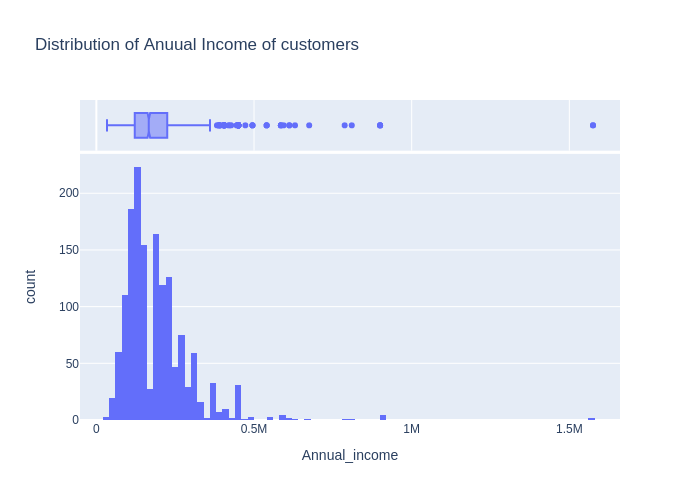

In [17]:
# Annual income distribution
fig = px.histogram(data, x='Annual_income', marginal="box", title= "Distribution of Anuual Income of customers")
fig.show('png')

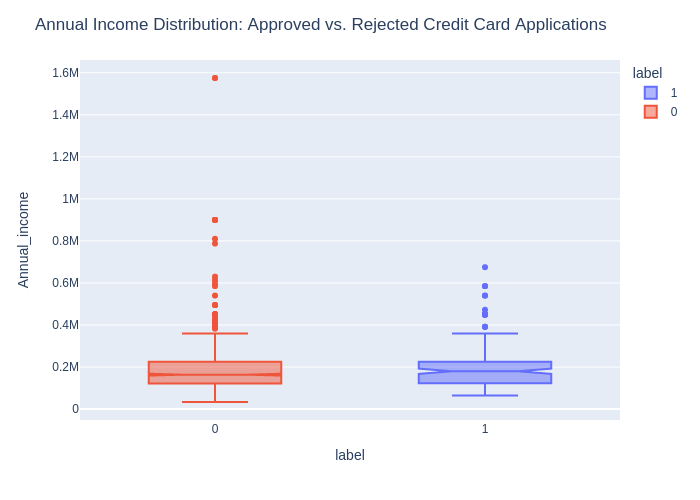

In [18]:
# Annual income of customers vs Approval status
fig = px.box(data, x='label', y= 'Annual_income', color = 'label' ,notched=True)
fig.update_layout(title="Annual Income Distribution: Approved vs. Rejected Credit Card Applications")
fig.show('png')

**OBSERVATIONS:**

* There are some customers with exceptionally high annual income.
* Those customers applications were approved (Annual Income > 0.6 Million).
* Customers with higher income had high approval rate.
* Some outliers in the maximum side. We need to handle this in data cleaning step.

**DECISIONS:**

* This simple analysis confirms our assumptions.
* We will consider Annual_income (**our assumption #1**) in our model training.


####CHILDREN

In [19]:
# Checking count of customer's children
data.CHILDREN.value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

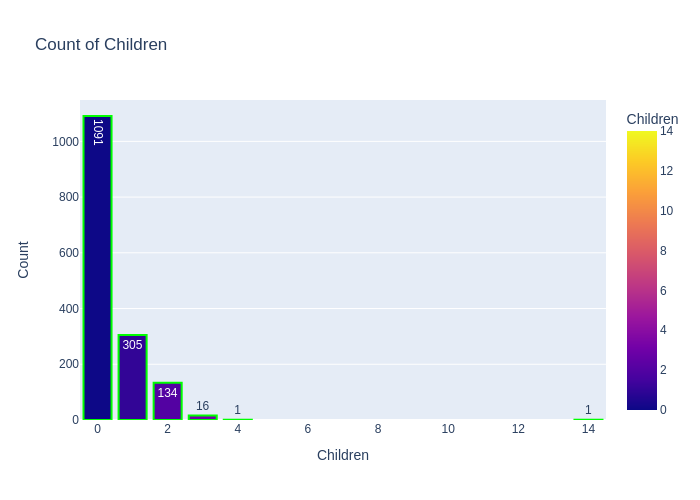

In [20]:
# Number of children distribution
CHILDREN = data['CHILDREN'].value_counts().reset_index().rename(columns={'index': 'Children', 'CHILDREN': 'Count'})
fig = px.bar(CHILDREN, x='Children', y='Count', color='Children', text='Count', title='Count of Children')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.show('png')

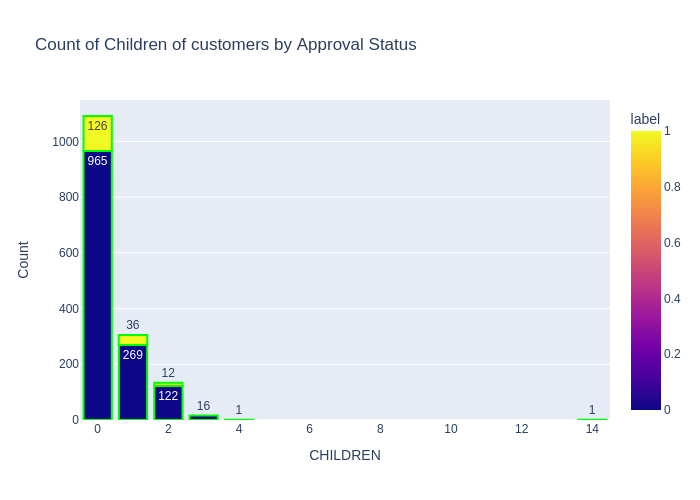

In [21]:
# Grouping the data by the number of children and approval status, calculating the count for each group
CHILDREN_grouped = data.groupby(['CHILDREN', 'label']).size().reset_index(name='Count')
fig = px.bar(CHILDREN_grouped, x='CHILDREN', y='Count', color='label',
             text='Count', title='Count of Children of customers by Approval Status', barmode='group')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.show('png')

**OBSERVATIONS:**

* We have seen that application approved rate is high for customers with less number of childrens.
* That means customers with high number of children are less likely to have approved crdit cards.
* Count of customers with no child is higher.
* There are some outliers in tha data like we are having customers with 14 children which is just impossible in this era. Need to tackle this in cleaning steps.

DECISIONS:

* We will consider CHILDREN variable(**Assumption #2**) for model training.

####Employed_days

In [22]:
# According to the dataset, -ve values of Employed_days means we can count from today ie. 0 day and +ve values means unemployed
# We converted all -ve values to +ve ie. number of days since a customer has been employed and +ve values to 0 means unemployed now.
Employment = data.copy()
Employment['Employed_days'] = data['Employed_days'].apply(lambda x: -x if x < 0 else 0)

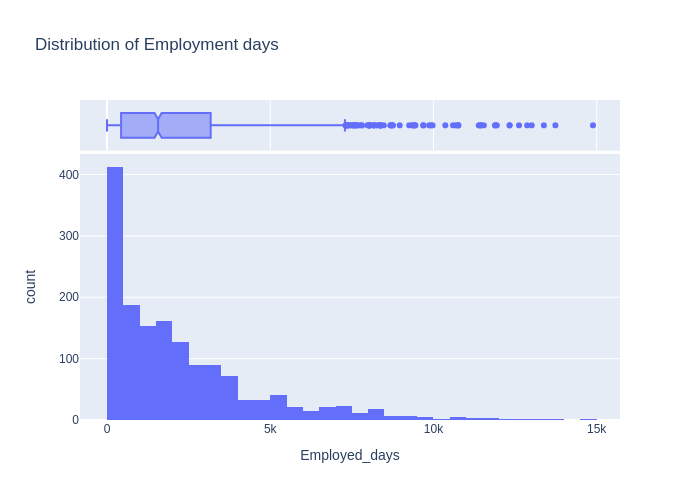

In [23]:
# Distribution of count of employment days
fig = px.histogram(Employment, x='Employed_days', marginal="box", title= "Distribution of Employment days")
fig.show('png')

* 0 means not employed. That means a large number of customers are unemployed.
* Even the customers who have been employed for more than 7,000 days also applied for a credit card.

In [24]:
# Creating a feature Employment_status only for visualization
Employment['Employment_status'] = np.where(data['Employed_days'] > 0, 'Unemployed', 'Employed')

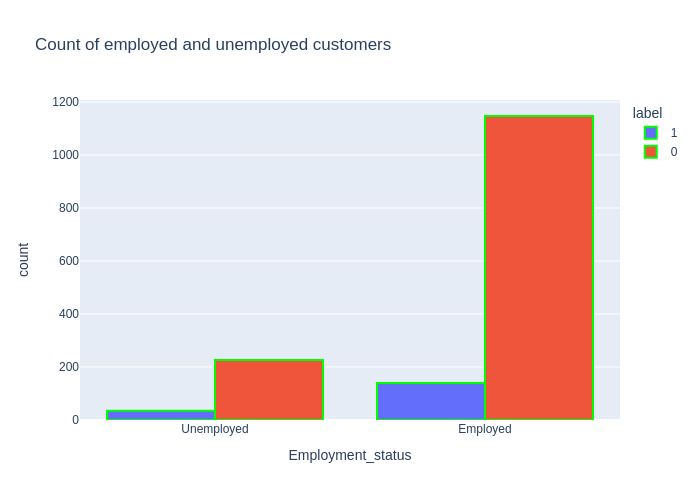

In [25]:
# Employment status vs Credit card approval status
fig = px.histogram(Employment, x = 'Employment_status', barmode = 'group', color ='label', title = 'Count of employed and unemployed customers')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.show('png')

**OBSERVATIONS:**

* Employed customers are more likely to have their credit card application approved.

**DECISIONS:**

* We will consider this employed_days (**Assumptions #3**) feature in our model training but only after converting it into categorical.

####Work_phone and phone

In [26]:
# Chacking value counts whether a customer has work phone or not
data['Work_Phone'].value_counts()

0    1226
1     322
Name: Work_Phone, dtype: int64

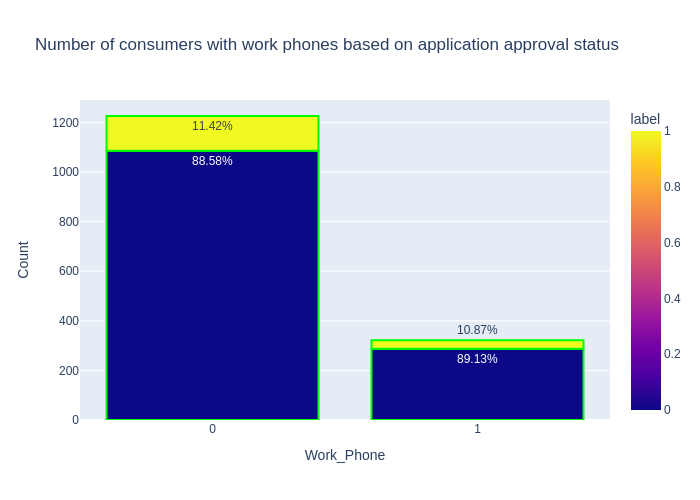

In [27]:
# Grouping the data by work_phone and approval_status
WorkPhone_grouped = data.groupby(['Work_Phone', 'label']).size().reset_index(name='Count')

# Calculate total counts for each Work_Phone category
total_counts = WorkPhone_grouped.groupby('Work_Phone')['Count'].transform('sum')

# Calculate percentages
WorkPhone_grouped['Percentage'] = (WorkPhone_grouped['Count'] / total_counts) * 100

fig = px.bar(WorkPhone_grouped, x='Work_Phone', y='Count', color='label',
             text='Percentage', title='Number of consumers with work phones based on application approval status', barmode='group')

fig.update_traces(texttemplate='%{text:.2f}%', marker=dict(line=dict(color='#00FF00', width=2)))

fig.show('png')

**OBSERVATIONS:**

* Work_Phone category '0' : Means no Work_Phone
* Work_Phone category '1' : Means having Work_Phone
* There are less number of customers who have a work phone.
* Ratio between Approval and rejected status for both the category is almost same.
* Will look for some more evidence to verify our **assumption #4**.


In [28]:
# Checking value counts for phone
data['Phone'].value_counts()

0    1069
1     479
Name: Phone, dtype: int64

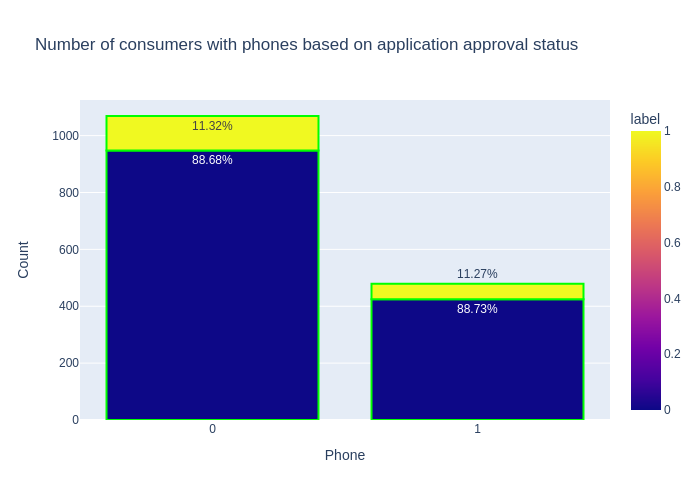

In [29]:
# Number of customers with phones based on application approval status
Phone_grouped = data.groupby(['Phone', 'label']).size().reset_index(name='Count')

# Calculate total counts for each Phone category
total_counts = Phone_grouped.groupby('Phone')['Count'].transform('sum')

# Calculate percentages
Phone_grouped['Percentage'] = (Phone_grouped['Count'] / total_counts) * 100

fig = px.bar(Phone_grouped, x='Phone', y='Count', color='label',
             text='Percentage', title='Number of consumers with phones based on application approval status', barmode='group')

fig.update_traces(texttemplate='%{text:.2f}%', marker=dict(line=dict(color='#00FF00', width=2)))

fig.show('png')

**OBSERVATIONS:**

* Higher number of customers don't have phone.
* Approval status ratio for both who have phone and who have not are same.
* Work phone and phone distribution is identical based on approval status.
* Will look for some more evidences to verify our assumption.

####Email

In [30]:
data['EMAIL_ID'].value_counts()

0    1405
1     143
Name: EMAIL_ID, dtype: int64

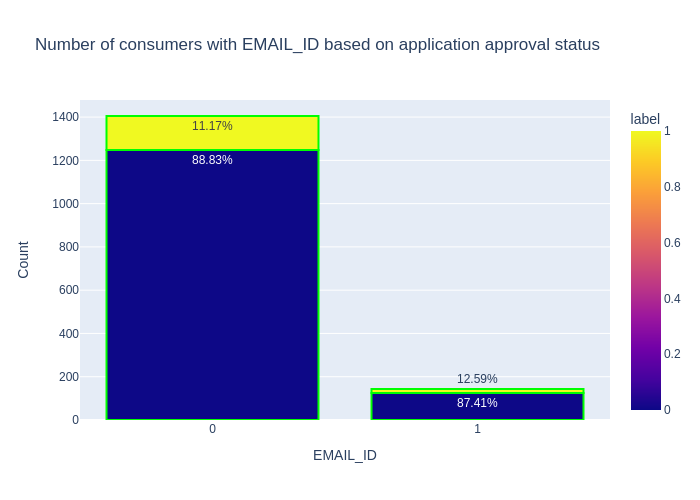

In [31]:
EMAIL_ID = data.groupby(['EMAIL_ID', 'label']).size().reset_index(name='Count')

# Calculate total counts for each EMAIL_ID category
total_counts = EMAIL_ID.groupby('EMAIL_ID')['Count'].transform('sum')

# Calculate percentages
EMAIL_ID['Percentage'] = (EMAIL_ID['Count'] / total_counts) * 100

fig = px.bar(EMAIL_ID, x='EMAIL_ID', y='Count', color='label',
             text='Percentage', title='Number of consumers with EMAIL_ID based on application approval status', barmode='group')

fig.update_traces(texttemplate='%{text:.2f}%', marker=dict(line=dict(color='#00FF00', width=2)))

fig.show('png')

**OBSERVATIONS:**

* EMAIL_ID : 0 (No email) and 1 (With email)
* Customers with no email ID are more numerous.
* The application approval rate is the same for both groups, i.e. who has mail and who does not.
* We will consider Email feature for our model training.(**Assumption #5**)

####Family_Members

In [32]:
data['Family_Members'].value_counts()

2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64

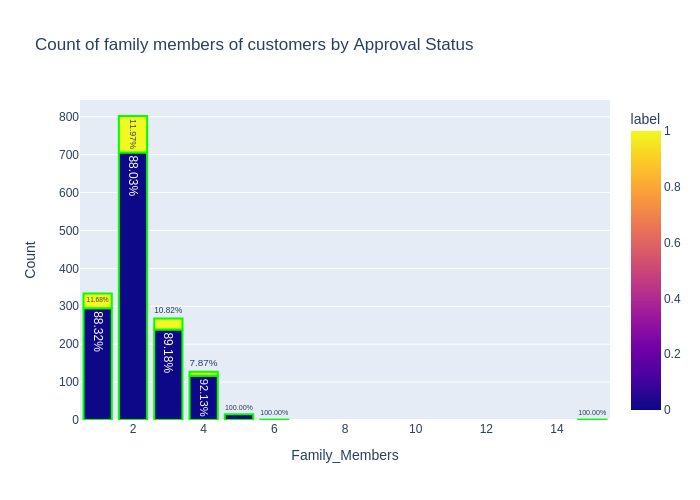

In [33]:
# Count of family members of customers by approval status
Family_grouped = data.groupby(['Family_Members', 'label']).size().reset_index(name='Count')

# Calculate total counts for each EMAIL_ID category
total_counts = Family_grouped.groupby('Family_Members')['Count'].transform('sum')

# Calculate percentages
Family_grouped['Percentage'] = (Family_grouped['Count'] / total_counts) * 100

fig = px.bar(Family_grouped, x='Family_Members', y='Count', color='label',
             text='Percentage', title='Count of family members of customers by Approval Status', barmode='group')
fig.update_traces(texttemplate='%{text:.2f}%', marker=dict(line=dict(color='#00FF00', width=2)))
fig.show('png')

**OBSERVATIONS:**

* Cutomers with family size as two are more in numbers and 87% of those.
* Application approval rate increases as the family member size increases.
* We have one customer with a family size of six, and his application was rejected.
* one customer with 15 members in his family, and his application was approved.

### **Exploring Categorical data**

In [34]:
# first 5 rows of categorical features
data[categorical_col].head()

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment,NaN
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment,NaN
2,F,Y,N,Commercial associate,Higher education,Married,House / apartment,NaN
3,F,Y,N,Commercial associate,Higher education,Married,House / apartment,NaN
4,F,Y,N,Commercial associate,Higher education,Married,House / apartment,NaN


####GENDER

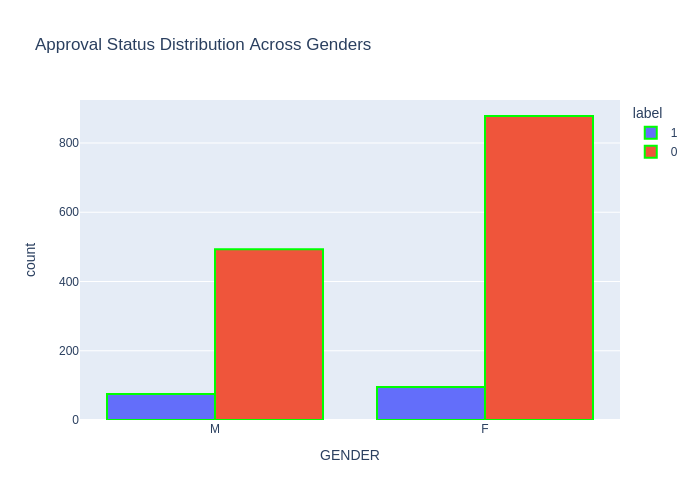

In [35]:
# Plotting Approval status across gender
fig = px.histogram(data, x = 'GENDER', barmode = 'group', color ='label', title = 'Approval Status Distribution Across Genders')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.show('png')

**OBSERVATIONS:**

* The number of female customers is higher.
* The application approval rate of female customers (90%) is higher than that of male customers (85%).
* Female customers are more likely to have their credit card application approved.

####Car_Owner

In [36]:
# Checking value counts for Car_ownership
data['Car_Owner'].value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

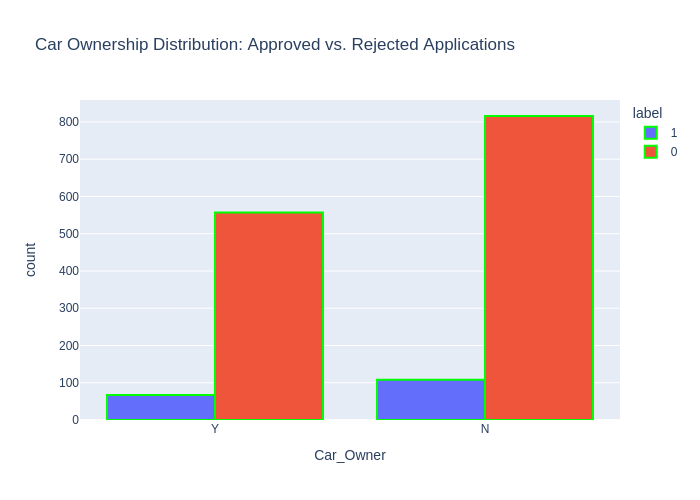

In [37]:
# Car Ownership Distribution: Approved vs Rejected Applications
fig = px.histogram(data, x = 'Car_Owner', barmode = 'group', color ='label', title = 'Car Ownership Distribution: Approved vs. Rejected Applications')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.show('png')

**OBSERVATIONS:**

* A large number of customers don't own a car.
* Approval rate of customer's application for both the category is almost same. (90% approx)
* However, we have a large number of applications approved for customers who don't own a car.
* We will look for some more evidences to verify our **assumption #8**.

####Property_Owner

In [38]:
# Value counts -whether a customer has any property or not
data['Propert_Owner'].value_counts()

Y    1010
N     538
Name: Propert_Owner, dtype: int64

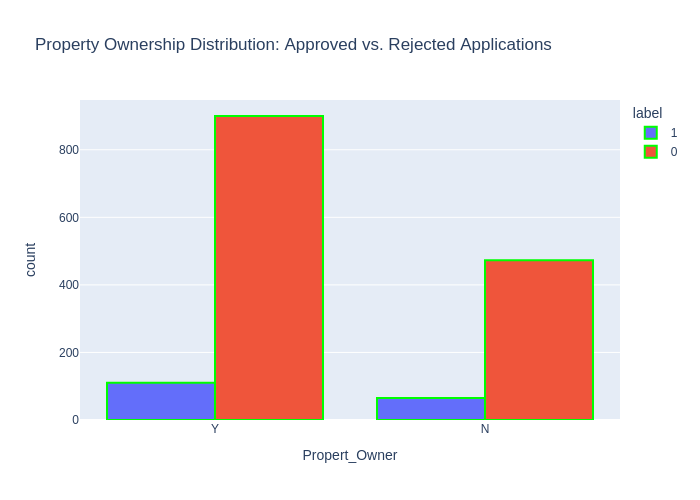

In [39]:
# Property ownership distribution: Approved vs Rejected applications
fig = px.histogram(data, x = 'Propert_Owner', barmode = 'group', color ='label', title = 'Property Ownership Distribution: Approved vs. Rejected Applications')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.show('png')

**OBSERVATIONS:**

* Maximum customers own a property.
* Approval rate of customer who own a property is high.
* The approval number is also higher when the customer doesn't own any property.

**DECISIONS:**

* We will consider Property_own feature for our model training. (**Assumption #9**)

####Type_Income

In [40]:
# Value counts: Income types of customers
data['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

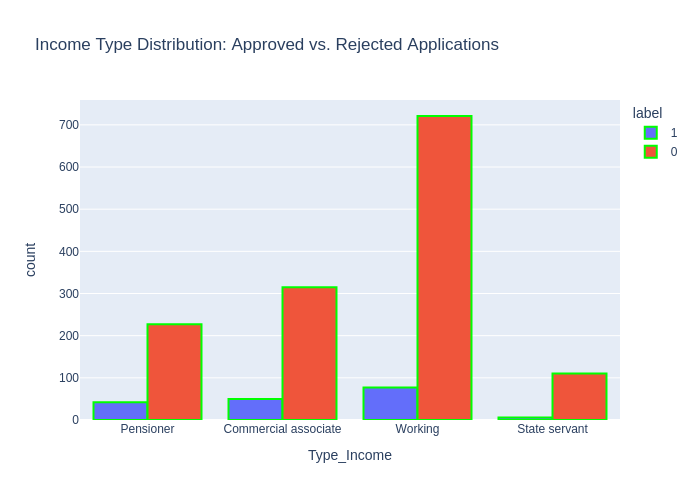

In [41]:
# Property Ownership Distribution: Approved vs Rejected Applications
fig = px.histogram(data, x = 'Type_Income', barmode = 'group', color ='label', title = 'Income Type Distribution: Approved vs. Rejected Applications')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.show('png')

**OBSERVATIONS:**

* There are four types of income in our dataset; all customers have fixed income types.
* Working class and state servant customers are more likely to have their credit card applications approved.

**DECISIONS:**

* We will consider Income type feature for model training. (**Assumption #10**)

####Housing_type

In [42]:
# Value_counts: Housing type
data['Housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

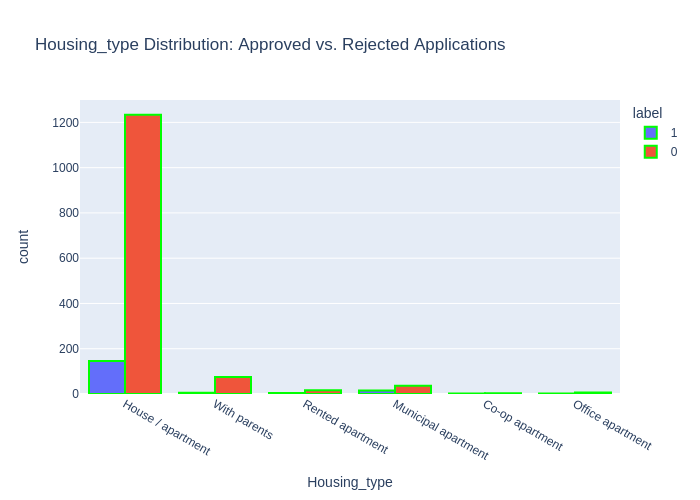

In [43]:
# Housing_type distribution: Approved vs Rejected Applications
fig = px.histogram(data, x = 'Housing_type', barmode = 'group', color ='label', title = 'Housing_type Distribution: Approved vs. Rejected Applications')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.show('png')

**OBSERVATIONS:**

* Customers who live in houses or apartments are more likely to have their credit card application approved.
* Approval rate is higher for those customers who live in House/apartment and with parents or in municipal apartment.
* We can compare by combining customers with stable income who live in house/apartment.

**DECISIONS:**

* We will consider Housing_type feature for model training. (**Assumption #11**)

##**Analyze by pivoting features**

Lets confirm some of our assumptions using correlation. Correlation between some of the features with the target variable.

* Below features have almost 0 correlation for certain values. It may be best to derive a feature or a set of features from these individual features.

In [44]:
# Correlation between Car_owner and Approval_status
data[['Car_Owner', 'label']].groupby(['Car_Owner'], as_index=False).mean().sort_values(by='label', ascending=False)

,Car_Owner,label
0,N,0.116883
1,Y,0.107372


In [45]:
# Correlation between Property owner and Approval_status
data[['Propert_Owner', 'label']].groupby(['Propert_Owner'], as_index=False).mean().sort_values(by='label', ascending=False)

,Propert_Owner,label
0,N,0.120818
1,Y,0.108911


In [46]:
# Correlation between Type_Income and Approval_status
data[['Type_Income', 'label']].groupby(['Type_Income'], as_index=False).mean().sort_values(by='label', ascending=False)

,Type_Income,label
1,Pensioner,0.156134
0,Commercial associate,0.136986
3,Working,0.096491
2,State servant,0.051724


In [47]:
# Correlation between GENDER and Approval_status
data[['GENDER', 'label']].groupby(['GENDER'], as_index=False).mean().sort_values(by='label', ascending=False)

,GENDER,label
1,M,0.132042
0,F,0.097636


##**Analyze by Information value and Weight of Evidence**

Information Value (IV) and Weight of Evidence (WoE) are concepts commonly used in credit risk assessment and predictive modeling to evaluate the predictive power of categorical variables. They help in understanding the relationship between a categorical feature and a binary target variable (e.g., credit card approval status) and can assist in feature selection and model building.

Information Value (IV):

* Typically, higher IV values are considered better indicators of predictive power.
* Commonly used ranges for interpreting IV:
* IV < 0.02: Very weak or no predictive power
* 0.02 ≤ IV < 0.1: Weak predictive power
* 0.1 ≤ IV < 0.3: Moderate predictive power
* 0.3 ≤ IV < 0.5: Strong predictive power
* IV ≥ 0.5: Very strong predictive power

Weight of Evidence (WoE):

* WoE values reflect the impact of a category on the odds of the event (e.g., credit approval) occurring.
* Positive WoE values indicate a higher likelihood of the event, while negative values indicate a lower likelihood.
* There isn't a specific "good" or "bad" range for WoE values, as their interpretation depends on the context and the directionality you're aiming for.
* Typically, we're looking for significant differences between WoE values for different categories of the feature.

In [48]:
# Information value function--
def calc_iv_woe(data, feature, target):
  data[feature] = data[feature].fillna("NULL")

  grouped = data.groupby(feature)[target].agg(['count', 'sum'])
  total_good = grouped['sum'].sum()
  total_bad = grouped['count'].sum() - total_good

  grouped['Distribution Good'] = grouped['sum'] / total_good
  grouped['Distribution Bad'] = (grouped['count'] - grouped['sum']) / total_bad

  grouped['WoE'] = np.log(grouped['Distribution Good'] / grouped['Distribution Bad'])
  grouped['IV'] = (grouped['Distribution Good'] - grouped['Distribution Bad']) * grouped['WoE']

  iv = grouped['IV'].sum()

  return iv, grouped



In [49]:
# Information value and WoE for GENDER column wrt Approval_status
iv, iv_data = calc_iv_woe(data, 'GENDER', 'label')
print("IV:", iv)
print(iv_data)

IV: 0.10882528785947876
        count  sum  Distribution Good  Distribution Bad       WoE        IV
GENDER                                                                     
F         973   95           0.542857          0.639476 -0.163802  0.015826
M         568   75           0.428571          0.359068  0.176946  0.012298
NULL        7    5           0.028571          0.001457  2.976258  0.080701


In [50]:
# Information value and WoE for Car_Owner column wrt Approval_status
iv, iv_data = calc_iv_woe(data, 'Car_Owner', 'label')
print("IV:", iv)
print(iv_data)

IV: 0.00218172002058985
           count  sum  Distribution Good  Distribution Bad       WoE        IV
Car_Owner                                                                     
N            924  108           0.617143          0.594319  0.037684  0.000860
Y            624   67           0.382857          0.405681 -0.057905  0.001322


In [51]:
# Information value and WoE for Propert_Owner column wrt Approval_status
iv, iv_data = calc_iv_woe(data, 'Propert_Owner', 'label')
print("IV:", iv)
print(iv_data)

IV: 0.0031560696065480107
               count  sum  Distribution Good  Distribution Bad       WoE  \
Propert_Owner                                                              
N                538   65           0.371429          0.344501  0.075259   
Y               1010  110           0.628571          0.655499 -0.041947   

                     IV  
Propert_Owner            
N              0.002027  
Y              0.001130  


In [52]:
# Information value and WoE for Type_Income column wrt Approval_status
iv, iv_data = calc_iv_woe(data, 'Type_Income', 'label')
print("IV:", iv)
print(iv_data)

IV: 0.09413422076655871
                      count  sum  Distribution Good  Distribution Bad  \
Type_Income                                                             
Commercial associate    365   50           0.285714          0.229425   
Pensioner               269   42           0.240000          0.165331   
State servant           116    6           0.034286          0.080117   
Working                 798   77           0.440000          0.525127   

                           WoE        IV  
Type_Income                               
Commercial associate  0.219418  0.012351  
Pensioner             0.372687  0.027828  
State servant        -0.848753  0.038899  
Working              -0.176866  0.015056  


In [53]:
# Information value and WoE for EDUCATION column wrt Approval_status
iv, iv_data = calc_iv_woe(data, 'EDUCATION', 'label')
print("IV:", iv)
print(iv_data)

IV: inf
                               count  sum  Distribution Good  \
EDUCATION                                                      
Academic degree                    2    0           0.000000   
Higher education                 426   55           0.314286   
Incomplete higher                 68    5           0.028571   
Lower secondary                   21    6           0.034286   
Secondary / secondary special   1031  109           0.622857   

                               Distribution Bad       WoE        IV  
EDUCATION                                                            
Academic degree                        0.001457      -inf       inf  
Higher education                       0.270211  0.151099  0.006660  
Incomplete higher                      0.045885 -0.473729  0.008202  
Lower secondary                        0.010925  1.143677  0.026717  
Secondary / secondary special          0.671522 -0.075230  0.003661  


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



In [54]:
# Information value and WoE for Marital_status column wrt Approval_status
iv, iv_data = calc_iv_woe(data, 'Marital_status', 'label')
print("IV:", iv)
print(iv_data)

IV: 0.08289666110902932
                      count  sum  Distribution Good  Distribution Bad  \
Marital_status                                                          
Civil marriage          101    4           0.022857          0.070648   
Married                1049  114           0.651429          0.680991   
Separated                96   14           0.080000          0.059723   
Single / not married    227   35           0.200000          0.139840   
Widow                    75    8           0.045714          0.048798   

                           WoE        IV  
Marital_status                            
Civil marriage       -1.128449  0.053930  
Married              -0.044381  0.001312  
Separated             0.292306  0.005927  
Single / not married  0.357820  0.021527  
Widow                -0.065284  0.000201  


In [55]:
# Information value and WoE for Housing_type column wrt Approval_status
iv, iv_data = calc_iv_woe(data, 'Housing_type', 'label')
print("IV:", iv)
print(iv_data)

IV: 0.12728143921670904
                     count  sum  Distribution Good  Distribution Bad  \
Housing_type                                                           
Co-op apartment          5    2           0.011429          0.002185   
House / apartment     1380  146           0.834286          0.898762   
Municipal apartment     53   16           0.091429          0.026948   
Office apartment         9    2           0.011429          0.005098   
Rented apartment        21    4           0.022857          0.012382   
With parents            80    5           0.028571          0.054625   

                          WoE        IV  
Housing_type                             
Co-op apartment      1.654502  0.015294  
House / apartment   -0.074442  0.004800  
Municipal apartment  1.221638  0.078772  
Office apartment     0.807204  0.005110  
Rented apartment     0.613048  0.006422  
With parents        -0.648083  0.016885  


In [56]:
# Information value and WoE for Type_Occupation column wrt Approval_status
iv, iv_data = calc_iv_woe(data, 'Type_Occupation', 'label')
print("IV:", iv)
print(iv_data)

IV: inf
                       count  sum  Distribution Good  Distribution Bad  \
Type_Occupation                                                          
Accountants               44    5           0.028571          0.028405   
Cleaning staff            22    2           0.011429          0.014567   
Cooking staff             21    4           0.022857          0.012382   
Core staff               174   23           0.131429          0.109978   
Drivers                   86    9           0.051429          0.056082   
HR staff                   3    0           0.000000          0.002185   
High skill tech staff     65    7           0.040000          0.042243   
IT staff                   2    2           0.011429          0.000000   
Laborers                 268   28           0.160000          0.174800   
Low-skill Laborers         9    2           0.011429          0.005098   
Managers                 136   14           0.080000          0.088857   
Medicine staff            50  

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



**OBSERVATIONS:**

* GENDER: Here we have positive WoE for males and null values. We will neither drop null values here nor impute mode. We will consider null values are separate gender type as 'Unknown'.

* Type_Income: Here we have positive WoE values for pensioners and state servants. We will derive that specific column for model training.

* Occupation_type: Here we have many categories with positive WoE. Null values implies high positive WoE. Here we will handle null values carefully.

* We will take a chance to consider all those values with positive WoE and IV values > 0.1

##Data Cleaning

In [57]:
# first five rows
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NULL,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NULL,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NULL,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NULL,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NULL,2,1


In [58]:
# Dropping duplicates
data = data.drop_duplicates()

###Renaming columns

In [59]:
# Renaming column names
data = data.rename(columns={'Propert_Owner': 'Property_Owner', 'label': 'Approval_Status'})

In [60]:
# Column names after renaming
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Approval_Status'],
      dtype='object')

###Handling missing values

In [61]:
# Checking for null values
data.isnull().sum()

Ind_ID              0
GENDER              0
Car_Owner           0
Property_Owner      0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count     22
Employed_days       0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
Approval_Status     0
dtype: int64

* We have null values in Annual_income and Birthday_count.
* We also have null values in GENDER and Type_Occupation as seen earlier which is named as 'NULL'.

####GENDER

In [62]:
# GENDER COLUMN: Checking the count of NULL in gender column
data[data['GENDER']=='NULL']['GENDER'].value_counts()

NULL    7
Name: GENDER, dtype: int64

* We have total 7 instance of NULL. We need to change it to 'Unknown'.

In [63]:
# Converting NULL to 'U' in gender column
data['GENDER'] = data['GENDER'].map(lambda x: 'U' if x == 'NULL' else x)

In [64]:
# Checking value counts of GENDER after handling missing values
data['GENDER'].value_counts()

F    973
M    568
U      7
Name: GENDER, dtype: int64

#### Occupation type

In [65]:
# Type_Occupation COLUMN: Checking the count of NULL in gender column
data[data['Type_Occupation'] == 'NULL']['Type_Occupation'].value_counts()

NULL    488
Name: Type_Occupation, dtype: int64

* Wow, we have 488 NULL in this column. Dropping is very dangerous in this case we will lost some important insights if we drop.

In [66]:
# Converting NULL to 'Unknown' as occupation type
data['Type_Occupation'] = data['Type_Occupation'].map(lambda x: 'Unknown' if x == 'NULL' else x)

In [67]:
# Checking value counts of occupation type after handling missingness.
data['Type_Occupation'].value_counts()

Unknown                  488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

####Annual_income

In [68]:
# Annual_income column: Checking skewness
data['Annual_income'].skew()

3.9245642452364167

* We have seen that the annual income column is highly right skewed.
* We will go for median imputation for missing values in this column.

In [69]:
# Imputing median values.
median_income = data['Annual_income'].median()
data['Annual_income'].fillna(median_income, inplace=True)

####Birthday_count

In [70]:
# Birthday_count column: Checking mode
data['Birthday_count'].mode()

0   -22655.0
1   -21363.0
2   -14523.0
3   -13557.0
Name: Birthday_count, dtype: float64

<Axes: xlabel='Birthday_count', ylabel='Count'>

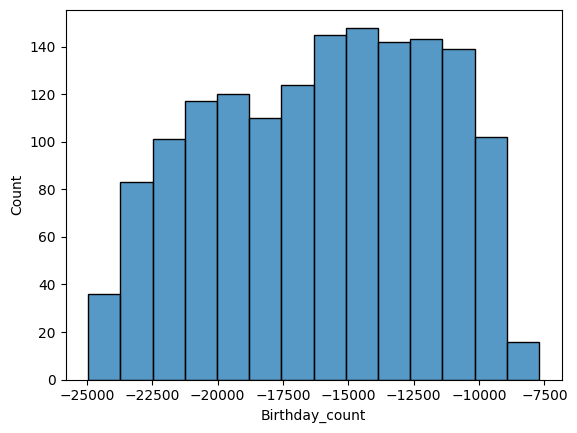

In [71]:
# Checking distribution of Birthday_count column
sns.histplot(data, x = 'Birthday_count')

**What does this -ve values of birthday count indicates?**

* Indicates the number of days since birth.
* If we convert these values to positive and then divide them by 365, we will get the approximate age of the customers.
* We will handle the null values after doing the previous steps.

###Handling feature inconsistency and adding new features

In [72]:
# first five rows
data.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approval_Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,Unknown,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Unknown,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,Unknown,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Unknown,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Unknown,2,1


####Deriving Age column from birthday_count

In [73]:
# Deriving a 'Age' column from birthday_count
data['Age'] = data['Birthday_count'].apply(lambda x: -x/365 if x < 0 else None)

<Axes: xlabel='Age', ylabel='Count'>

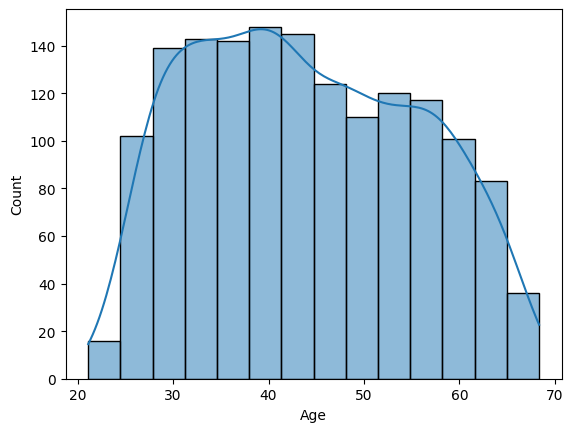

In [74]:
# Plotting Age
sns.histplot(data, x = 'Age', kde =True)

**OBSERVATIONS:**

* Its visible that our new column age is somehow normally distributed.
* We will now use mean for imputing missing values in Age column.

In [75]:
# Missing value handling in Age column
data['Age'] = data['Age'].fillna(data['Age'].mean())

####Deriving Employed_or_Not column from Employed_Days and converting -ve values of Employed_days to +ve.

In [76]:
# Converting -ve to +ve nd all positive to 0
data['Employed_days'] = data['Employed_days'].apply(lambda x: -x if x < 0 else 0)

# Deriving a new column from Employed_days
data['Employed_or_Not'] =  data['Employed_days'].map(lambda x: 1 if x >0 else 0)

###Outliers handling

In [77]:
# first five rows after feature addition
data.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approval_Status,Age,Employed_or_Not
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,0,1,0,0,0,Unknown,2,1,51.430137,0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,Unknown,2,1,37.142466,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,Unknown,2,1,43.946143,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,Unknown,2,1,37.142466,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,Unknown,2,1,37.142466,1


<Axes: xlabel='Annual_income'>

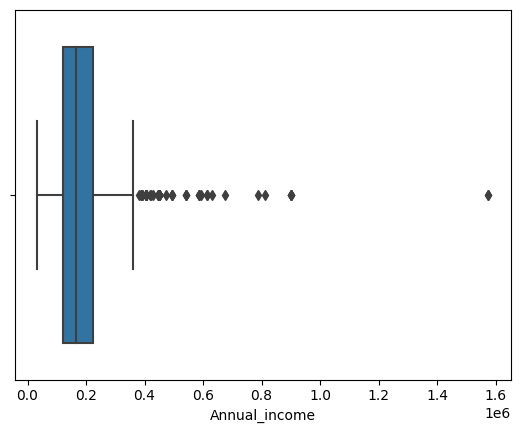

In [78]:
# Checking outliers for Annual_income using boxplot
sns.boxplot(data, x = 'Annual_income')

**OBSERVATIONS:**

* We have outliers in the right side.
* Annual income is right skewed. Hence we will use IQR method to deal with outliers.

In [79]:
# IQR Method-- Finding 1st quantile, 3rd quantile and IQR.
Q1 = data['Annual_income'].quantile(0.25)
Q3 = data['Annual_income'].quantile(0.75)

IQR = Q3 - Q1

# Calculating the extreme boundries here which means 3*IQR as there are more number of outliers in the right side
lower_fence = Q1 - (IQR*3)
upper_fence = Q3 + (IQR*3)

print(lower_fence, upper_fence)

-189000.0 535500.0


<Axes: xlabel='Annual_income', ylabel='Count'>

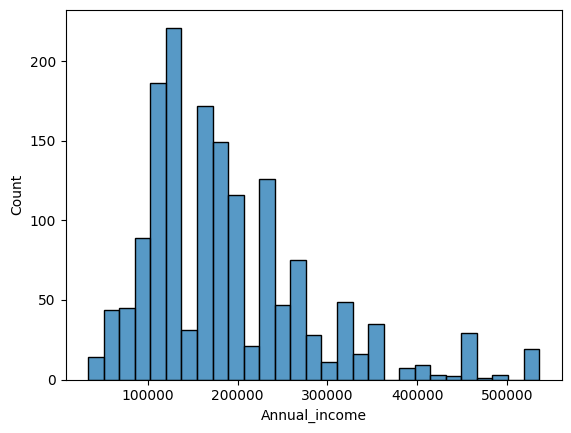

In [80]:
# Capping and checking the distribution again.
data.loc[data['Annual_income'] >=upper_fence, 'Annual_income'] = upper_fence
sns.histplot(data['Annual_income'])

* Distribution looks very close to gaussian distribution.
* Now we will proceed to Data preprocessing to process the data including Encoding, feature selection and scaling.

##Data Preprocessing

Data preprocessing is a critical step in the data analysis and machine learning pipeline. It involves cleaning, transforming, and organizing raw data into a suitable format for analysis and modeling.

If data preprocessing is not performed or is done inadequately, it can lead to a range of issues that negatively impact the quality of analysis and machine learning models. Here are some potential consequences of not performing data preprocessing:

* Data Quality Issues.
* Biased and Inaccurate Models.
* Poor Model Performance.
* Missed Opportunities for Insights and many more.

###Data Encoding

In [81]:
# Top 5 rows of categorical features.
data.select_dtypes(include = 'object').head()

,GENDER,Car_Owner,Property_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment,Unknown
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Unknown
2,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Unknown
3,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Unknown
4,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Unknown


In [82]:
# Defining one_hot_encoder : mostly used for nominal variable encoding.
def one_hot_encode_column(data, column_name):
    encoded_column = pd.get_dummies(data[column_name], prefix=column_name, drop_first=True)
    return encoded_column

In [83]:
# Applying One-hot-encoder to all the nominal varible.
encoded_gender = one_hot_encode_column(data, 'GENDER')
encoded_CarOwner = one_hot_encode_column(data, 'Car_Owner')
encoded_PropertyOwner = one_hot_encode_column(data, 'Property_Owner')
encoded_TypeIncome = one_hot_encode_column(data, 'Type_Income')
encoded_MaritalStatus = one_hot_encode_column(data, 'Marital_status')
encoded_Housingtype = one_hot_encode_column(data, 'Housing_type')
encoded_TypeOccupation = one_hot_encode_column(data, 'Type_Occupation')

In [84]:
# Concatenating all the encoded variables with the original dataframe.
Credit_Data = pd.concat([data, encoded_gender, encoded_CarOwner, encoded_PropertyOwner, encoded_TypeIncome,
                         encoded_MaritalStatus, encoded_Housingtype, encoded_TypeOccupation],axis=1)

In [85]:
# Dropping the previous columns which were encoded.
Credit_Data.drop(["GENDER","Car_Owner","Property_Owner", 'Type_Income', 'Marital_status', 'Housing_type', 'Type_Occupation'],axis=1,inplace=True)
Credit_Data.head()

,Ind_ID,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Unknown,Type_Occupation_Waiters/barmen staff
0,5008827,0,180000.0,Higher education,-18772.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5009744,0,315000.0,Higher education,-13557.0,586,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,5009746,0,315000.0,Higher education,NaN,586,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5009749,0,166500.0,Higher education,-13557.0,586,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5009752,0,315000.0,Higher education,-13557.0,586,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
# Defining Label Encoder and performing encoding for Education column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

Credit_Data['EDUCATION'] = label_encoder.fit_transform(Credit_Data['EDUCATION'])

In [87]:
# Dataframe after encoding
Credit_Data.head()

,Ind_ID,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Unknown,Type_Occupation_Waiters/barmen staff
0,5008827,0,180000.0,1,-18772.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5009744,0,315000.0,1,-13557.0,586,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,5009746,0,315000.0,1,NaN,586,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5009749,0,166500.0,1,-13557.0,586,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5009752,0,315000.0,1,-13557.0,586,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


###Feature Selection

In [88]:
# looking for irrelevant columns to drop
Credit_Data.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'EDUCATION', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'Approval_Status', 'Age', 'Employed_or_Not',
       'GENDER_M', 'GENDER_U', 'Car_Owner_Y', 'Property_Owner_Y',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff', 'Type_Occupation_Laborers',
       'Type_Occupation_Low-skill 

In [89]:
# Dropping columns which are not important for modelling
Credit_Data = Credit_Data.drop(['Ind_ID', 'Birthday_count', 'Mobile_phone'], axis=1)

In [90]:
# Checking dataframe after dropping irrelevant columns
Credit_Data.head()

,CHILDREN,Annual_income,EDUCATION,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,Approval_Status,Age,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Unknown,Type_Occupation_Waiters/barmen staff
0,0,180000.0,1,0,0,0,0,2,1,51.430137,...,0,0,0,0,0,0,0,0,1,0
1,0,315000.0,1,586,1,1,0,2,1,37.142466,...,0,0,0,0,0,0,0,0,1,0
2,0,315000.0,1,586,1,1,0,2,1,43.946143,...,0,0,0,0,0,0,0,0,1,0
3,0,166500.0,1,586,1,1,0,2,1,37.142466,...,0,0,0,0,0,0,0,0,1,0
4,0,315000.0,1,586,1,1,0,2,1,37.142466,...,0,0,0,0,0,0,0,0,1,0


In [91]:
# Separating independent and dependent variables
X = Credit_Data.drop('Approval_Status', axis =1)
y = Credit_Data['Approval_Status']

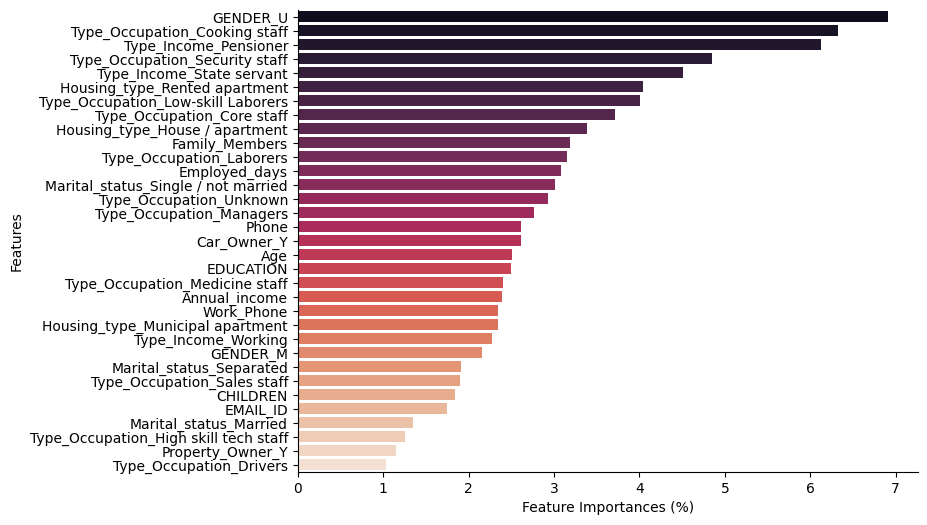

In [92]:
# Performing feature selection using XGBoost feature importance
from xgboost import XGBClassifier
import xgboost
model = XGBClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
total_importance = feature_importances.sum()  # Total importance to calculate percentage

# Convert feature importances to percentages
feature_importance_percentages = (feature_importances / total_importance) * 100

# Select features with importance > 1%
selected_features = feature_importance_percentages[feature_importance_percentages > 1]

sns.barplot(x=selected_features, y=selected_features.index, palette="rocket")
sns.despine()
plt.xlabel("Feature Importances (%)")
plt.ylabel("Features")
plt.show()

* Here we have selected those features whose feature importance is > 1%.
* We have seen that that some of our hypothesis is **correct**.

In [93]:
# Selecting only those features as selected by the xgboost model
X = Credit_Data[selected_features.index.tolist()]
y = Credit_Data['Approval_Status']

In [94]:
# Splitting data into training and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state=42)

In [95]:
# Scaling down the features into normally distributed data using Standard Scaling.
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler.
sc = StandardScaler()

# Transforming training set.
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Model training and evaluation

In [96]:
# Importing all the libraries needed for model training and evaluation.

from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [97]:
# Creating a dictionary of different models.
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient-Boosting": GradientBoostingClassifier(),
    "XG-Boost": XGBClassifier(max_depth=5)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model

  # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.89
- F1 score: 0.840339
- Precision: 0.899434
- Recall: 0.886427
----------------------------------
Model performance for Test set
- Accuracy: 0.90
- Fl score: 0.86
- Precision: 0.84
- Recall: 0.90


Decision Tree
Model performance for Training set
- Accuracy: 0.99
- F1 score: 0.992539
- Precision: 0.992610
- Recall: 0.992613
----------------------------------
Model performance for Test set
- Accuracy: 0.85
- Fl score: 0.87
- Precision: 0.89
- Recall: 0.85


Random Forest
Model performance for Training set
- Accuracy: 0.99
- F1 score: 0.992589
- Precision: 0.992580
- Recall: 0.992613
----------------------------------
Model performance for Test set
- Accuracy: 0.94
- Fl score: 0.92
- Precision: 0.93
- Recall: 0.94


Support Vector Machine
Model performance for Training set
- Accuracy: 0.90
- F1 score: 0.863154
- Precision: 0.908219
- Recall: 0.897507
----------------------------------
Model performance for Test set
-

**OBSERVATIONS:**

* We have seen that random forest classifier and xgboost performs better for both train and test set (F1 score = 92-93%)

* The model is showing strong generalization on the test data as well, which is a positive sign, indicating that it's not overfitting.


##Hyperparameter tuning for random forest classifer

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the classifier
classifier = RandomForestClassifier()

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9104326676907322


##Random Forest model training with tunned parameters

In [99]:
model = RandomForestClassifier(max_depth = 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred =  model.predict(X_test)

# Performance of Test set
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

# Performance of Training set
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

print('Model performance for Training set')
print("- Accuracy: {:.2f}".format(model_train_accuracy))
print('- F1 score: {:2f}'.format(model_train_f1))
print('- Precision: {:2f}'.format(model_train_precision))
print('- Recall: {:2f}'.format(model_train_recall))

print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
print('- Fl score: {:.2f}'.format(model_test_f1))
print('- Precision: {:.2f}'.format(model_test_precision))
print('- Recall: {:.2f}'.format(model_test_recall))


print('='*30)
print('\n')

Model performance for Training set
- Accuracy: 0.99
- F1 score: 0.991620
- Precision: 0.991651
- Recall: 0.991690
----------------------------------
Model performance for Test set
- Accuracy: 0.94
- Fl score: 0.93
- Precision: 0.93
- Recall: 0.94




* Accuracy and F1 score is improved by 1% ie. close to 94% after hyperparameter tuning.
* As our dataset is imbalanced that's why it is showing a accuracy gap of nearly 5% between the train set and the test set.
* For more generalized results we need to handle the imbalancy.


##Handling Imbalance using SMOTE

In [100]:
!pip install imbalanced-learn

In [101]:
# Handling imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [102]:
# Checking value counts of target column
y_smote.value_counts()

1    1373
0    1373
Name: Approval_Status, dtype: int64

In [103]:
Credit_Data['Approval_Status'].value_counts()

0    1373
1     175
Name: Approval_Status, dtype: int64

In [104]:
# Again Performing train_test_split of balanced data.
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)

In [105]:
# Creating a dictionary of different models.
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient-Boosting": GradientBoostingClassifier(),
    "XG-Boost": XGBClassifier(max_depth=5)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model

  # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.66
- F1 score: 0.662790
- Precision: 0.663010
- Recall: 0.662851
----------------------------------
Model performance for Test set
- Accuracy: 0.64
- Fl score: 0.64
- Precision: 0.64
- Recall: 0.64


Decision Tree
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.997399
- Precision: 0.997399
- Recall: 0.997399
----------------------------------
Model performance for Test set
- Accuracy: 0.88
- Fl score: 0.88
- Precision: 0.89
- Recall: 0.88


Random Forest
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.997399
- Precision: 0.997403
- Recall: 0.997399
----------------------------------
Model performance for Test set
- Accuracy: 0.93
- Fl score: 0.93
- Precision: 0.93
- Recall: 0.93


Support Vector Machine
Model performance for Training set
- Accuracy: 0.53
- F1 score: 0.426729
- Precision: 0.626273
- Recall: 0.532258
----------------------------------
Model performance for Test set
-

**OBSERVATIONS:**

* Xgboost works well with the balanced data.
* Training set: Accuracy = 99% , F1score = 99%
* Test set: Accuracy = 95%, F1 score = 95%
* According to our observation Random forest overfits with the balanced data, it works better with the imbalanced data.
* As dataset is completely imbalance, hence we are not able to get the more generalized result.

##Experiments

In [106]:
Credit_Data.head()

,CHILDREN,Annual_income,EDUCATION,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,Approval_Status,Age,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Unknown,Type_Occupation_Waiters/barmen staff
0,0,180000.0,1,0,0,0,0,2,1,51.430137,...,0,0,0,0,0,0,0,0,1,0
1,0,315000.0,1,586,1,1,0,2,1,37.142466,...,0,0,0,0,0,0,0,0,1,0
2,0,315000.0,1,586,1,1,0,2,1,43.946143,...,0,0,0,0,0,0,0,0,1,0
3,0,166500.0,1,586,1,1,0,2,1,37.142466,...,0,0,0,0,0,0,0,0,1,0
4,0,315000.0,1,586,1,1,0,2,1,37.142466,...,0,0,0,0,0,0,0,0,1,0


In [107]:
X= Credit_Data.drop('Approval_Status', axis=1)
y = Credit_Data['Approval_Status']


In [108]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 0)

In [110]:
def run_RandomForest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy of Random Forest Classifier: ', accuracy_score(y_test, y_pred))
    print("Precision score of Random Forest Classifier: {}".format(precision_score(y_test,y_pred)))
    print("Recall score of Random Forest Classifier: {}".format(recall_score(y_test,y_pred)))
    print("F1 Score of Random Forest Classifier: {}".format(f1_score(y_test,y_pred)))
    print('Confusion Matrix of Random Forest Classifier')
    print(confusion_matrix(y_test,y_pred))

def run_GradientBoost(X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier(n_estimators=50)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy of Gradient Boost Classifier: ', accuracy_score(y_test, y_pred))
    print("Precision of Gradient Boost Classifier: {}".format(precision_score(y_test,y_pred)))
    print("Recall score of Gradient Boost Classifier: {}".format(recall_score(y_test,y_pred)))
    print("F1 Score of Gradient Boost Classifier: {}".format(f1_score(y_test,y_pred)))
    print('Confusion Matrix  of Gradient Boost Classifier')
    print(confusion_matrix(y_test,y_pred))

def run_Xgboost(X_train, X_test, y_train, y_test):
    model = XGBClassifier(n_estimators=100)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy of Xg Boost Classifier: ', accuracy_score(y_test, y_pred))
    print("Precision of Xg Boost Classifier: {}".format(precision_score(y_test,y_pred)))
    print("Recall score of Xg Boost Classifier: {}".format(recall_score(y_test,y_pred)))
    print("F1 Score of Xg Boost Classifier: {}".format(f1_score(y_test,y_pred)))
    print('Confusion Matrix  of Xg Boost Classifier')
    print(confusion_matrix(y_test,y_pred))

###Performance Without Feature Selection

In [111]:
run_RandomForest(X_train, X_test, y_train, y_test)

Accuracy of Random Forest Classifier:  0.9454545454545454
Precision score of Random Forest Classifier: 0.9452554744525548
Recall score of Random Forest Classifier: 0.9452554744525548
F1 Score of Random Forest Classifier: 0.9452554744525548
Confusion Matrix of Random Forest Classifier
[[261  15]
 [ 15 259]]


In [112]:
run_GradientBoost(X_train, X_test, y_train, y_test)

Accuracy of Gradient Boost Classifier:  0.8690909090909091
Precision of Gradient Boost Classifier: 0.8659420289855072
Recall score of Gradient Boost Classifier: 0.8722627737226277
F1 Score of Gradient Boost Classifier: 0.8690909090909091
Confusion Matrix  of Gradient Boost Classifier
[[239  37]
 [ 35 239]]


In [113]:
run_Xgboost(X_train, X_test, y_train, y_test)

Accuracy of Xg Boost Classifier:  0.9490909090909091
Precision of Xg Boost Classifier: 0.9330985915492958
Recall score of Xg Boost Classifier: 0.9671532846715328
F1 Score of Xg Boost Classifier: 0.9498207885304659
Confusion Matrix  of Xg Boost Classifier
[[257  19]
 [  9 265]]


###Logistic Regression with L1 Regularization ( Lasso Regression )

In [114]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(LogisticRegression(penalty = 'l1', C = 0.05, solver = 'liblinear'))
sel.fit(X_train, y_train)
sel.get_support()

array([ True, False,  True,  True,  True,  True, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False,  True, False])

In [115]:
X_train_l1 = sel.transform(X_train)
X_test_l1 = sel.transform(X_test)
X_train_l1.shape,X_test_l1.shape

((2196, 22), (550, 22))

###Performance after doing L1 Regularization ( Lasso Regression )

In [116]:
run_RandomForest(X_train_l1, X_test_l1, y_train, y_test)

Accuracy of Random Forest Classifier:  0.9381818181818182
Precision score of Random Forest Classifier: 0.9285714285714286
Recall score of Random Forest Classifier: 0.948905109489051
F1 Score of Random Forest Classifier: 0.9386281588447654
Confusion Matrix of Random Forest Classifier
[[256  20]
 [ 14 260]]


In [117]:
run_GradientBoost(X_train_l1, X_test_l1, y_train, y_test)

Accuracy of Gradient Boost Classifier:  0.8672727272727273
Precision of Gradient Boost Classifier: 0.8654545454545455
Recall score of Gradient Boost Classifier: 0.8686131386861314
F1 Score of Gradient Boost Classifier: 0.8670309653916211
Confusion Matrix  of Gradient Boost Classifier
[[239  37]
 [ 36 238]]


In [118]:
run_Xgboost(X_train_l1, X_test_l1, y_train, y_test)

Accuracy of Xg Boost Classifier:  0.9272727272727272
Precision of Xg Boost Classifier: 0.90625
Recall score of Xg Boost Classifier: 0.9525547445255474
F1 Score of Xg Boost Classifier: 0.9288256227758006
Confusion Matrix  of Xg Boost Classifier
[[249  27]
 [ 13 261]]


###Logistic Regression with L2 Regularization ( Ridge Regression )

In [119]:
sel = SelectFromModel(LogisticRegression(penalty = 'l2', C = 0.05, solver = 'liblinear'))
sel.fit(X_train, y_train)
sel.get_support()

array([ True, False, False, False,  True,  True, False, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False,  True, False])

In [120]:
X_train_l2 = sel.transform(X_train)
X_test_l2 = sel.transform(X_test)
X_train_l2.shape,X_test_l2.shape

((2196, 20), (550, 20))

###Performance after doing L2 Regularization ( Ridge Regression )

In [121]:
run_RandomForest(X_train_l2, X_test_l2, y_train, y_test)

Accuracy of Random Forest Classifier:  0.8872727272727273
Precision score of Random Forest Classifier: 0.8785714285714286
Recall score of Random Forest Classifier: 0.8978102189781022
F1 Score of Random Forest Classifier: 0.888086642599278
Confusion Matrix of Random Forest Classifier
[[242  34]
 [ 28 246]]


In [122]:
run_GradientBoost(X_train_l2, X_test_l2, y_train, y_test)

Accuracy of Gradient Boost Classifier:  0.8181818181818182
Precision of Gradient Boost Classifier: 0.8175182481751825
Recall score of Gradient Boost Classifier: 0.8175182481751825
F1 Score of Gradient Boost Classifier: 0.8175182481751826
Confusion Matrix  of Gradient Boost Classifier
[[226  50]
 [ 50 224]]


In [123]:
run_Xgboost(X_train_l2, X_test_l2, y_train, y_test)

Accuracy of Xg Boost Classifier:  0.8781818181818182
Precision of Xg Boost Classifier: 0.8683274021352313
Recall score of Xg Boost Classifier: 0.8905109489051095
F1 Score of Xg Boost Classifier: 0.8792792792792793
Confusion Matrix  of Xg Boost Classifier
[[239  37]
 [ 30 244]]


###Feature Selection by LDA

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_train_lda.shape, X_test_lda.shape

((2196, 1), (550, 1))

###Performance after LDA

In [125]:
run_RandomForest(X_train_lda, X_test_lda, y_train, y_test)

Accuracy of Random Forest Classifier:  0.8563636363636363
Precision score of Random Forest Classifier: 0.8571428571428571
Recall score of Random Forest Classifier: 0.8540145985401459
F1 Score of Random Forest Classifier: 0.8555758683729433
Confusion Matrix of Random Forest Classifier
[[237  39]
 [ 40 234]]


In [126]:
run_GradientBoost(X_train_lda, X_test_lda, y_train, y_test)

Accuracy of Gradient Boost Classifier:  0.850909090909091
Precision of Gradient Boost Classifier: 0.9067796610169492
Recall score of Gradient Boost Classifier: 0.781021897810219
F1 Score of Gradient Boost Classifier: 0.8392156862745098
Confusion Matrix  of Gradient Boost Classifier
[[254  22]
 [ 60 214]]


In [127]:
run_Xgboost(X_train_lda, X_test_lda, y_train, y_test)

Accuracy of Xg Boost Classifier:  0.8818181818181818
Precision of Xg Boost Classifier: 0.8913857677902621
Recall score of Xg Boost Classifier: 0.8686131386861314
F1 Score of Xg Boost Classifier: 0.8798521256931608
Confusion Matrix  of Xg Boost Classifier
[[247  29]
 [ 36 238]]


###Feature Reduction by PCA

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(X_train)

PCA(n_components=2, random_state=42)

In [129]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((2196, 2), (550, 2))

###Performance after PCA

In [130]:
run_RandomForest(X_train_pca, X_test_pca, y_train, y_test)

Accuracy of Random Forest Classifier:  0.7490909090909091
Precision score of Random Forest Classifier: 0.772
Recall score of Random Forest Classifier: 0.7043795620437956
F1 Score of Random Forest Classifier: 0.7366412213740458
Confusion Matrix of Random Forest Classifier
[[219  57]
 [ 81 193]]


In [131]:
run_GradientBoost(X_train_pca, X_test_pca, y_train, y_test)

Accuracy of Gradient Boost Classifier:  0.7054545454545454
Precision of Gradient Boost Classifier: 0.6891891891891891
Recall score of Gradient Boost Classifier: 0.7445255474452555
F1 Score of Gradient Boost Classifier: 0.7157894736842104
Confusion Matrix  of Gradient Boost Classifier
[[184  92]
 [ 70 204]]


In [132]:
run_Xgboost(X_train_pca, X_test_pca, y_train, y_test)

Accuracy of Xg Boost Classifier:  0.7654545454545455
Precision of Xg Boost Classifier: 0.7888446215139442
Recall score of Xg Boost Classifier: 0.7226277372262774
F1 Score of Xg Boost Classifier: 0.7542857142857143
Confusion Matrix  of Xg Boost Classifier
[[223  53]
 [ 76 198]]


##Conclusion and Recommendations


###**Conclusion**

In this analysis, we examined the performance of different classifiers on a credit card approval dataset with imbalanced data. Here are the key findings:

* When trained on balanced data, XGBoost achieved remarkable performance on the training set, with an accuracy and F1 score of 99%.

* On the test set, XGBoost maintained high accuracy and F1 score, with values of 95%.

* These results indicate that XGBoost works exceptionally well with balanced data and can generalize effectively to unseen data.

* In contrast to XGBoost, Random Forest showed signs of overfitting when trained on balanced data. It performed exceptionally well on the imbalanced training set and test set, with an accuracy and F1 score of 99% and 94% respectively.

###**Recommendations**

1. **Consider Data Resampling:**

* Given the dataset's significant class imbalance, consider resampling techniques such as oversampling the minority class or undersampling the majority class to address the imbalance.
* By creating a more balanced dataset, we can potentially improve the generalization and performance of machine learning.

2. **Feature Selection and Engineering:**

* Continue exploring feature selection techniques to identify the most relevant features for credit card approval prediction.
* Consider engineering new features that might enhance model performance.

3. **Hyperparameter Tuning:**

* Conduct comprehensive hyperparameter tuning for both XGBoost and Random Forest to optimize their performance on this specific dataset.
* Grid search or randomized search can help identify the best hyperparameter settings.

4. **Evaluate More Models:**

* Experiment with other classification algorithms suitable for imbalanced datasets, such as Support Vector Machines (SVM), Neural Networks, or gradient boosting variations.
* Select models based on their performance metrics and how well they address the class imbalance.

5. **Collect More Data:**

* Consider collecting more data, especially from the minority class, to improve model training and generalization.
